# BLACK FRIDAY SALES DATA ANALSIS

### Description
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products.

### Libraries
We will be using the Pandas, Numpy, Seaborn, and Plotly Python libraries for this analysis.

In [3]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go

### Data Import
Let's import the data into a Pandas dataframe and check it out 

In [5]:
data = pd.read_csv('BlackFriday.csv')

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.shape

(537577, 12)

In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.0+ MB


In [8]:
# check if we have any missing values in the dataset 
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [9]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


### unique values
Lets now explore the unique values in some of the features. Remember there is a total of 537577 entries:

In [10]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
data['Marital_Status'].unique()

array([0, 1], dtype=int64)

### - Gender

In [12]:
count1 = data['Gender'].value_counts()

In [13]:
labels = count1.index
values = count1.values
colors = ['#FEBFB3', '#E1396C']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', 
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

We can see that the number of male clients recorded exceeds the number of female clients so men's purchasing power is greater than women's purchasing power, even in normal circumstances.

In [14]:
count2 = data['Marital_Status'].value_counts()

In [15]:
labels = count2.index
values = count2.values
colors = ['#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', 
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

Most of our customers are more than 60% married, I see that the strategy of targeting families to ensure more clients succeed

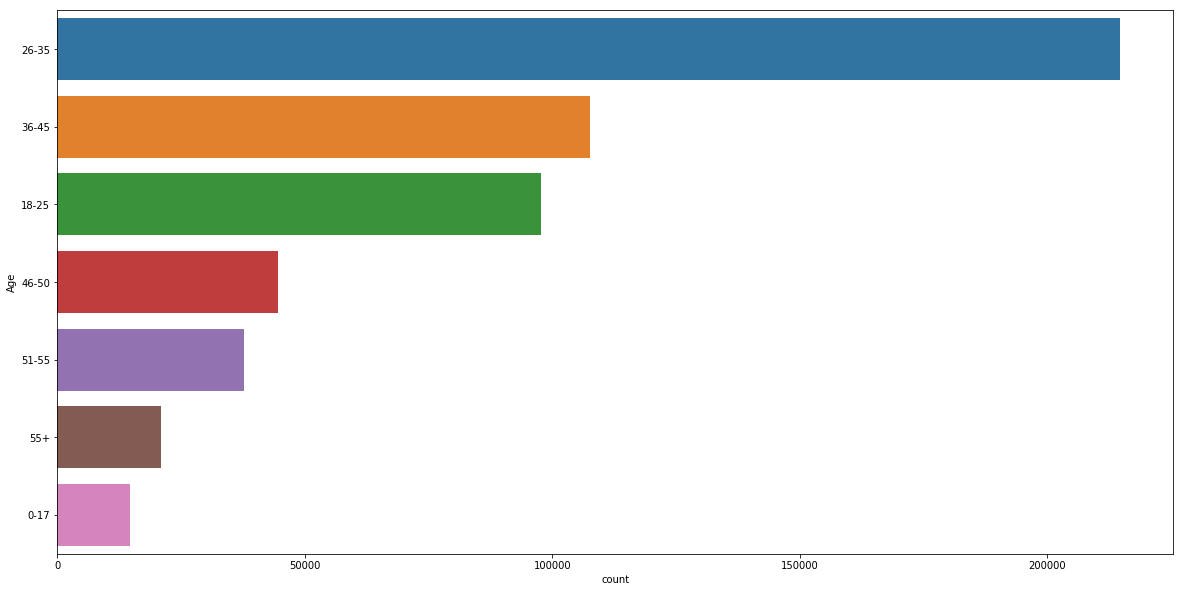

In [16]:
#Number of categories of apps in the store : 
plt.figure(figsize=(20,10))
sns.countplot(y = data['Age'], data = data , order = data['Age'].value_counts().index)

Obviously, we can consider that the target age group of our stores is the age group of 26-35 years, we have achieved sales of more than 3 billion in the age group of 26-45 years

In [17]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


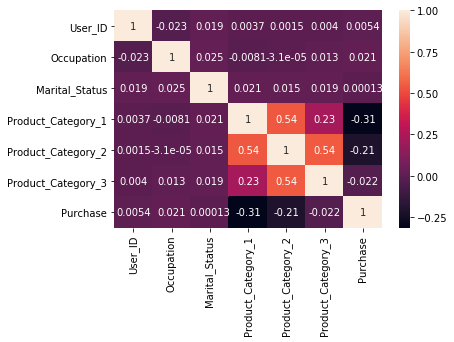

In [18]:
sns.heatmap(data.corr() , annot =True)

In [19]:
count3 = data['Age'].value_counts

In [20]:
data.Gender.unique()
data.Gender.value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

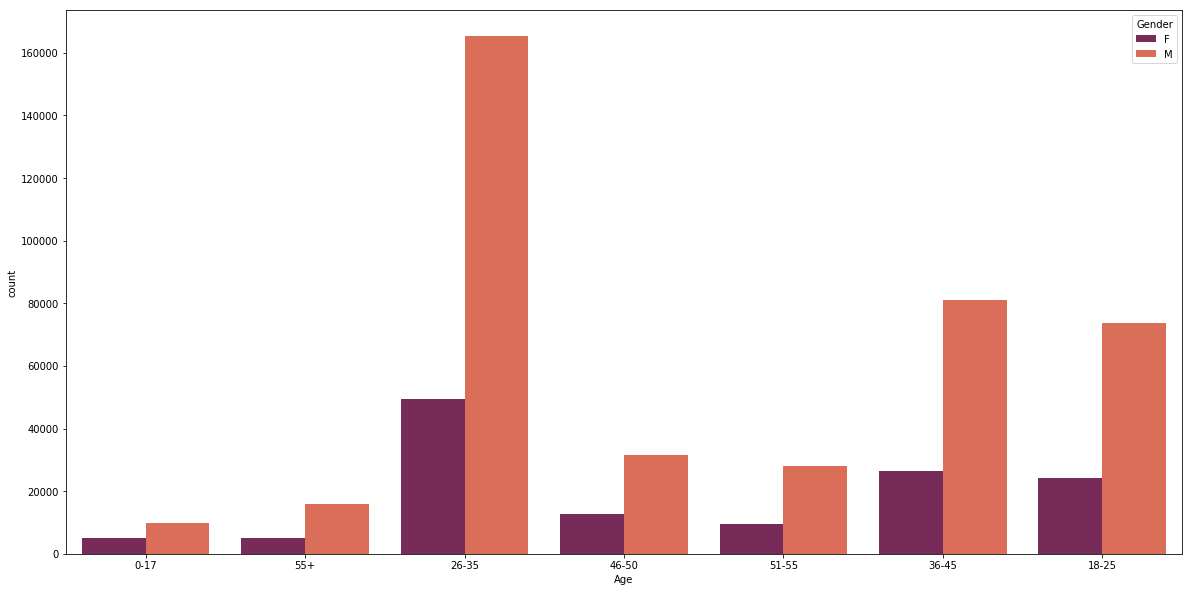

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(data['Age'],hue=data['Gender'],palette="rocket")

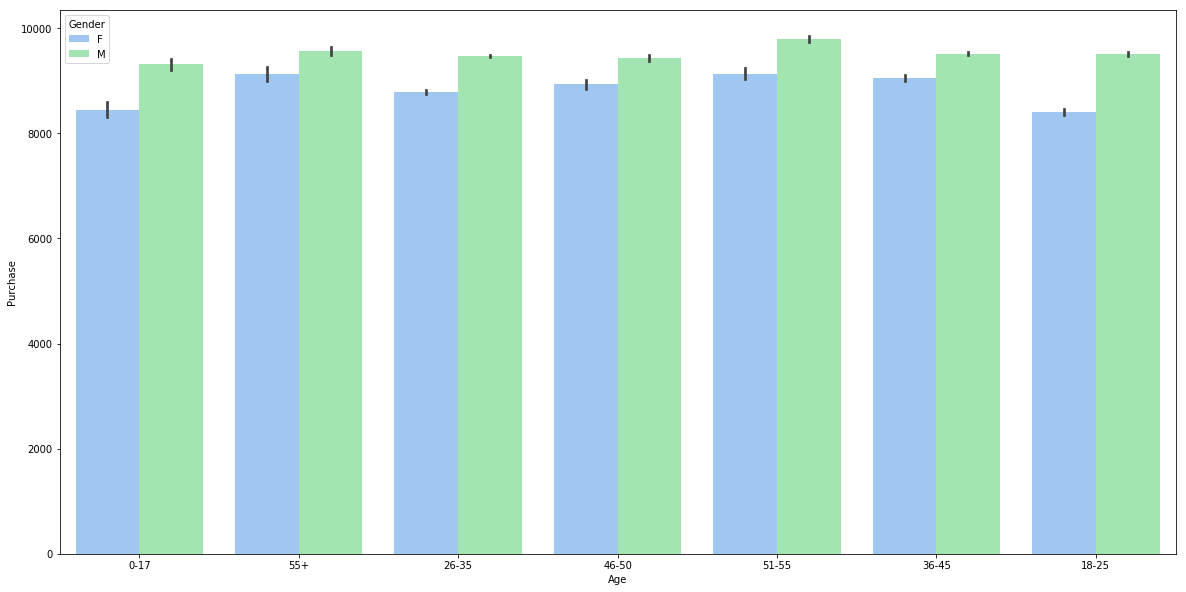

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x = "Age",y = "Purchase",hue="Gender", data = data,palette="pastel")

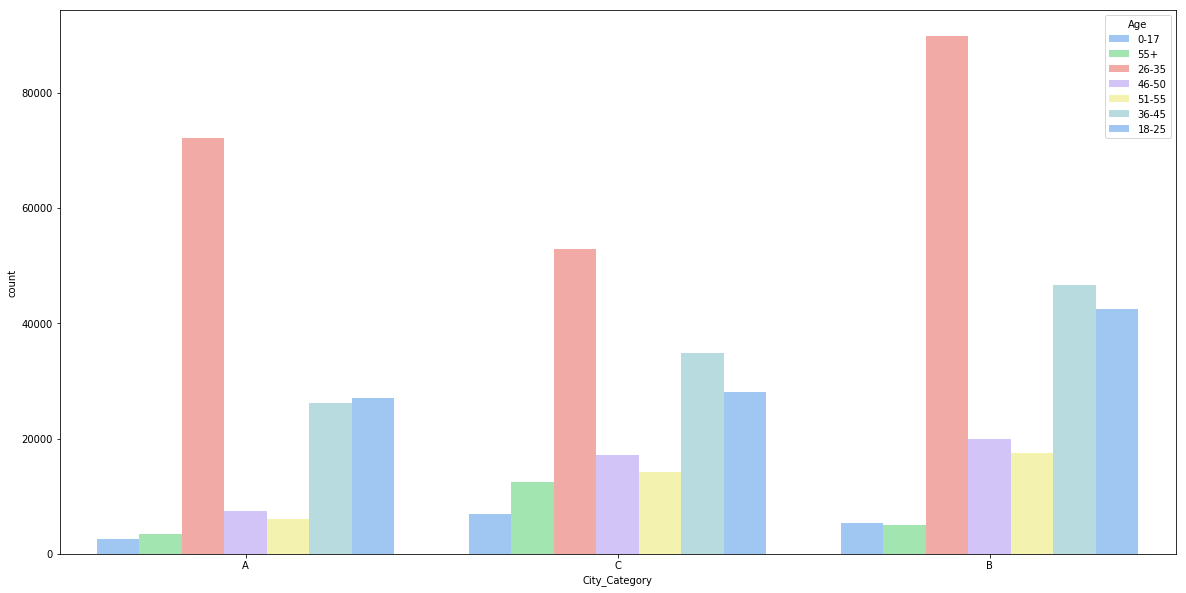

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(data['City_Category'],hue=data['Age'],palette="pastel")

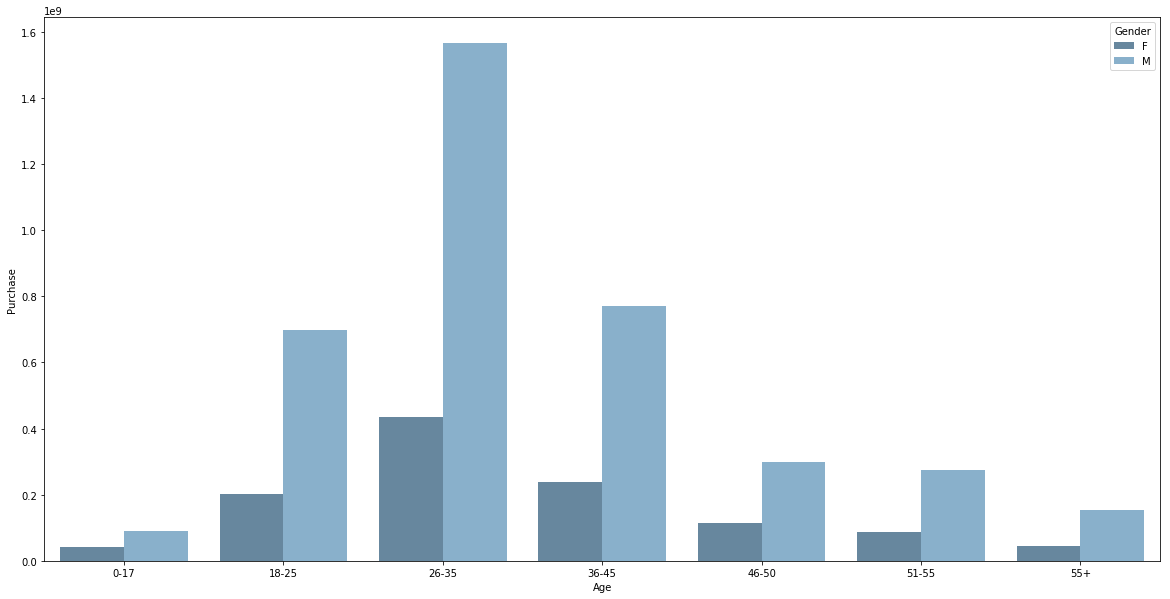

In [24]:
plt.figure(figsize=(20,10))
purchase_by_Age = data.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=purchase_by_Age,alpha = 0.8,palette="Blues_d")

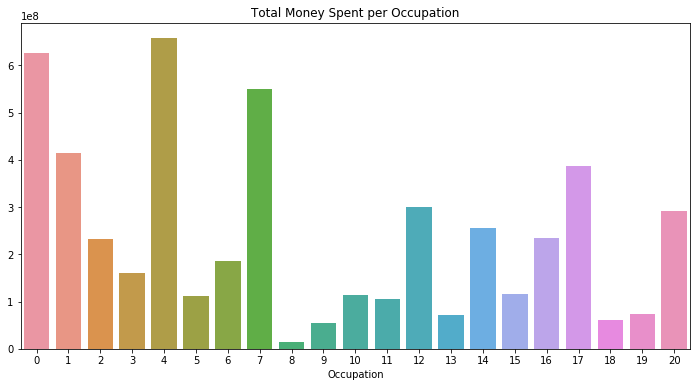

In [6]:
spent_by_occ = data.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

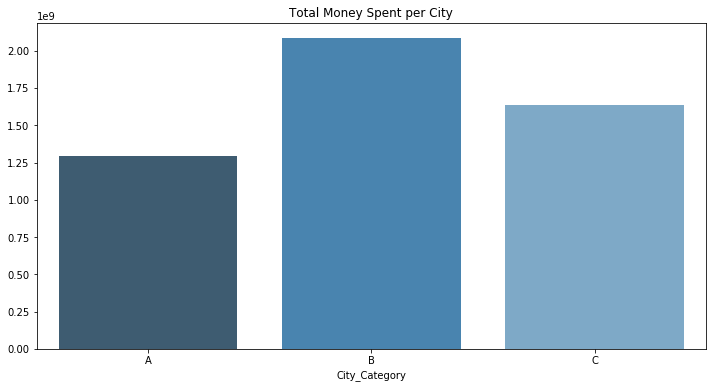

In [13]:
city_by_occ = data.groupby(by='City_Category').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=city_by_occ.index,y=city_by_occ.values,palette="Blues_d")
plt.title('Total Money Spent per City')
plt.show()